In [1]:
import gymnasium as gym
import pygame
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import savgol_filter

q_table = None
env = gym.make("FrozenLake8x8-v1", is_slippery=True, render_mode="human")





## Reinforcement Learning

The **reinforcement learning** is a paradigm of machine learning that often relies on the interaction of **agent** and **environment**.


This is a diagram of the **Markov Decision Process**, which is the best friend of RL and probabilistic decision-making models in general. We'll refer to it as **MDP** for short.

---

### MDP

The **MDP** is described with:
- **States**: all possible states the agent could encounter, $s \in \mathcal{S}$
- **Actions**: set of possible actions, $a \in \mathcal{A}(s)$, for every state
- **Rewards**: set of rewards for $r = R(s) \in \mathbb{R}$, meaning all states have some reward (or none)

---

Also, to explain the main idea of the MDP, we should have **discrete time steps**:
$$ t \in \{0, 1, 2, \dots, n\}$$

MDP has an assumption that **previous steps don't affect the underlying probability distribution**, then it looks like:

$$
p(s', r \mid s, a)
$$

MDP defines the probability of getting new state $s'$ and receiving reward $r$ after taking action $a$ in state $s$.

MDP describes the **environment**, and the **agent** behavior is described within **policy**.

---

## Policy $\pi$

Policy $\pi(a \mid s)$ tells the **probability of taking a particular action** $a$ among $\mathcal{A}(s)$ when being in state $s$.

---

## Return $G_t$

Now we have defined the environment and agent and could even test the setup.

For this test, the authors (of the setup) follow the **uniform distribution** — this is called the **random policy**.

Now the agent is performing **random actions**, completing the **SARSA loop**, but now it is practically useless.
We need to introduce the way to **improve policy**.

---

### Return $G_t$

The return $G_t$ is **accumulated rewards over all future time steps**.
Also, we want to consider **closer rewards as more valuable** — for that, we add **discount factor** $\gamma$, so:

$$
G_t = \sum_{k=t+1}^{T} \gamma^{k - t - 1} R_k
$$

---

With the idea of return formalized, the **goal for optimal policy** might be described as **maximizing expected return**:

$$
\pi^* = \arg\max_{\pi} \mathbb{E}_\pi [G_t]
$$

---

Let me know if you'd like this exported as a `.md` file or need it translated to another format like PDF or LaTeX source.

In [2]:
def run(q_table, episodes = 1, is_slippery = True):
    pygame.init()
    env = gym.make("FrozenLake8x8-v1", is_slippery=is_slippery, render_mode="human")
    policy = q_table

    action_map = {
        0: "LEFT",
        1: "DOWN",
        2: "RIGHT",
        3: "UP"
    }

    for i in range(episodes):
        state = env.reset()[0]
        print(f"Initial state is [{state // 8}, {state % 8}]")
        terminated = False
        truncated = False

        while(not terminated and not truncated):
            action_space = policy[state]
            action = np.argmax(action_space)
            print(f"Action is [{action}]")
            print(f"Action is {action_map[action]}]")
            new_state, reward, terminated, truncated,_ = env.step(action)

            state = new_state

            print(f"New state is [{new_state // 8}, {new_state % 8}], reward is {reward}")

    env.close()

    pygame.quit()

first run with random policy

In [3]:
q_random = np.random.rand(env.observation_space.n, env.action_space.n)

run(q_random ,episodes = 1)

Initial state is [0, 0]
Action is [0]
Action is LEFT]
New state is [0, 0], reward is 0.0
Action is [0]
Action is LEFT]
New state is [0, 0], reward is 0.0
Action is [0]
Action is LEFT]
New state is [0, 0], reward is 0.0
Action is [0]
Action is LEFT]
New state is [1, 0], reward is 0.0
Action is [2]
Action is RIGHT]
New state is [0, 0], reward is 0.0
Action is [0]
Action is LEFT]
New state is [1, 0], reward is 0.0
Action is [2]
Action is RIGHT]
New state is [2, 0], reward is 0.0
Action is [2]
Action is RIGHT]
New state is [3, 0], reward is 0.0
Action is [0]
Action is LEFT]
New state is [3, 0], reward is 0.0
Action is [0]
Action is LEFT]
New state is [2, 0], reward is 0.0
Action is [2]
Action is RIGHT]
New state is [3, 0], reward is 0.0
Action is [0]
Action is LEFT]
New state is [3, 0], reward is 0.0
Action is [0]
Action is LEFT]
New state is [3, 0], reward is 0.0
Action is [0]
Action is LEFT]
New state is [2, 0], reward is 0.0
Action is [2]
Action is RIGHT]
New state is [2, 1], reward is 

In [4]:
def plot_q_table(q_table, episode = None):
    values = q_table.max(axis=1)

    # values = q_table.mean(axis=1)

    values_grid = values.reshape(8,8)

    plt.imshow(
        values_grid,
        origin='upper',
        extent=[0, 8, 0, 8],
        interpolation='nearest',
        aspect='equal'
    )
    plt.grid(which='major', axis='both', linestyle='-', color='k', linewidth=1)

    holes = [(5,3), (3,3), (4,5),(2,2), (2,1), (1,1), (0,3), (1,4), (1,6), (2,6)]

    ax = plt.gca()
    for (row, col) in holes:
        rect = plt.Rectangle(
                (col, row),
                1, 1,
                fill=True,
                color='red',
                alpha=1
            )
        ax.add_patch(rect)

    rect = plt.Rectangle(
                (7, 0),
                1, 1,
                fill=True,
                color='green',
                alpha=1
            )
    ax.add_patch(rect)

    rect = plt.Rectangle(
                (0, 7),
                1, 1,
                fill=True,
                color='green',
                alpha=1
            )
    ax.add_patch(rect)

    plt.title("Value table" + f"at step #{episode}" if episode is not None else "")
    plt.colorbar()
    plt.show()




    actions = q_table.argmax(axis=1)

    actions_grid = actions.reshape(8,8)

    plt.imshow(
        values_grid,
        origin='upper',
        extent=[0, 8, 0, 8],
        interpolation='nearest',
        aspect='equal'
    )
    plt.grid(which='major', axis='both', linestyle='-', color='k', linewidth=1)

    holes = [(5,3), (3,3), (4,5),(2,2), (2,1), (1,1), (0,3), (1,4), (1,6), (2,6)]

    ax = plt.gca()
    for (row, col) in holes:
        rect = plt.Rectangle(
                (col, row),
                1, 1,
                fill=True,
                color='red',
                alpha=1
            )
        ax.add_patch(rect)

    rect = plt.Rectangle(
                (7, 0),
                1, 1,
                fill=True,
                color='green',
                alpha=1
            )
    ax.add_patch(rect)

    rect = plt.Rectangle(
                (0, 7),
                1, 1,
                fill=True,
                color='green',
                alpha=1
            )
    ax.add_patch(rect)

    for y in range(8):
        for x in range(8):
            # (0,0)  (y,x)-> (0, 7)(x, 7 - y)

            action = actions_grid[y, x]

            match action:
                case 0:
                    # top
                    start_y, start_x ,arrow_x, arrow_y = 0.2, 0.5, 0 , 0.2
                case 1:
                    # bot
                    start_y, start_x ,arrow_x, arrow_y = 0.8, 0.5, 0 , -0.2
                case 2:
                    # right
                    start_y, start_x ,arrow_x, arrow_y = 0.5, 0.2 , 0.2 , 0
                case 3:
                    # left
                    start_y, start_x ,arrow_x, arrow_y = 0.5, 0.8 , -0.2 , 0
                case _:
                    print("Unknown action")


            plt.arrow(x + start_x, 7 - y + start_y, arrow_x, arrow_y, width = 0.1)

    plt.title("Policy table" + f"at step #{episode}" if episode is not None else "")
    plt.colorbar()
    plt.show()

def train(
        episodes=4000,
        lr=1e-2,
        gamma=0.9,
        td_num=4,
        cost_of_living=0.01,
        T=100,
        render=False,
        isSlippery=True,
        label="base",
        draw_q_table=None,
        terminated_penalty=1):

    if draw_q_table is None:
        draw_q_table = range(episodes // 5, episodes, episodes // 5)

    pygame.init()
    global q_table
    env = gym.make("FrozenLake8x8-v1", is_slippery=isSlippery, render_mode='human' if render else None)
    q_table = np.zeros((env.observation_space.n, env.action_space.n))
    epsilon = 1
    epsilon_decay = 1/(episodes * 0.9)
    rewards_per_episode = np.zeros(episodes)
    time_rewards_per_episode = np.zeros(episodes)
    success_rate = np.zeros(episodes)
    steps_per_episode = []

    for episode in range(episodes):
        trajectory = []
        state = env.reset()[0]
        steps = 0
        total_reward = 0

        for t in range(T):
            if np.random.random() < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(q_table[state])

            new_state, reward, terminated, truncated, _ = env.step(action)
            steps += 1

            # Adjust reward for falling into a hole
            if (terminated) and (reward == 0):
                reward = reward - 1

            if reward == 1:
                success_rate[episode] = 1.0
                time_rewards_per_episode[episode] = 1
                steps_per_episode.append(steps)
                reward = reward - cost_of_living * steps

            # episode truncated
            if t == 99:
                reward = reward - terminated_penalty

            reward -= cost_of_living

            total_reward += reward

            # Store transition with termination info
            trajectory.append((state, action, reward, new_state, terminated))

            # Process n-step updates
            while len(trajectory) >= td_num:
                # Pop the oldest transition
                oldest_state, oldest_action, oldest_reward, oldest_new_state, oldest_terminated = trajectory.pop(0)

                G = oldest_reward
                current_gamma = gamma
                term_in_window = oldest_terminated

                # Sum rewards for next (td_num-1) steps or until termination
                for k in range(1, td_num):
                    if (k-1) >= len(trajectory):
                        break
                    entry = trajectory[k-1]
                    r_k, term_k = entry[2], entry[4]
                    G += current_gamma * r_k
                    current_gamma *= gamma
                    if term_k:
                        term_in_window = True
                        break

                # Add discounted Q-value if no termination in the window
                if not term_in_window and len(trajectory) >= (td_num-1):
                    last_entry = trajectory[td_num-2]  if td_num != 1 else (oldest_state, oldest_action, oldest_reward, oldest_new_state, oldest_terminated)
                    last_state = last_entry[3]
                    if not last_entry[4]:
                        G += current_gamma * np.max(q_table[last_state])

                # Update Q-value
                q_table[oldest_state][oldest_action] += lr * (G - q_table[oldest_state][oldest_action])

            state = new_state
            if terminated or truncated:
                break

        # Process remaining transitions after episode ends
        while len(trajectory) > 0:

            if trajectory[-1][3] == 0.99:
                print("a")

            oldest_entry = trajectory.pop(0)
            s, a, r, s_new, term = oldest_entry

            G = r
            current_gamma = gamma

            for k in range(1, len(trajectory)+1):
                if (k-1) >= len(trajectory):
                    break
                entry = trajectory[k-1]
                r_k, term_k = entry[2], entry[4]
                G += current_gamma * r_k
                current_gamma *= gamma

            # No Q-value added after episode termination
            q_table[s][a] += lr * (G - q_table[s][a])

        # Decay exploration and learning rate
        epsilon = max(epsilon - epsilon_decay, 0)
        rewards_per_episode[episode] = total_reward
        # if epsilon == 0:
        #     lr *= 0.1  # Decay learning rate after exploration stops

        # print(f"Episode {episode} | Reward: {rewards_per_episode[episode]} | Epsilon: {epsilon}")

        if episode in draw_q_table:
            print("__________________________________")
            plot_q_table(q_table, episode)

    env.close()
    pygame.quit()


    print("__________________________________")
    print("Learning curve")
    # sum_rewards = np.zeros(episodes)
    # for t in range(episodes):
    #     sum_rewards[t] = np.sum(rewards_per_episode[max(0, t-100):(t+1)])
    # sum_rewards[0] = sum_rewards[1]
    plt.plot(rewards_per_episode)

    moving_average_window = episodes // 10
    moving_averages = savgol_filter(rewards_per_episode, moving_average_window, 5)


    plt.plot(moving_averages, label=f'{label}')
    plt.title(label)
    plt.legend()
    plt.show()

    print("__________________________________")
    print(f"{label}")
    mean_reward_rate = np.mean(rewards_per_episode[int(len(rewards_per_episode)*0.9):])
    mean_success_rate = np.mean(success_rate[int(len(success_rate)*0.9):])
    print(f"Mean reward: {mean_reward_rate}")
    print(f"Mean success rate: {mean_success_rate}")
    if steps_per_episode:
        mean_steps = np.mean(steps_per_episode[int(len(steps_per_episode)*0.9):])
        print(f"Mean steps per success episode: {mean_steps}")
    else:
        print("No successful episodes to calculate mean steps.")

    print("__________________________________")
    print("Final Q_Table:")
    plot_q_table(q_table)

firstly test if the train function is working properly

__________________________________


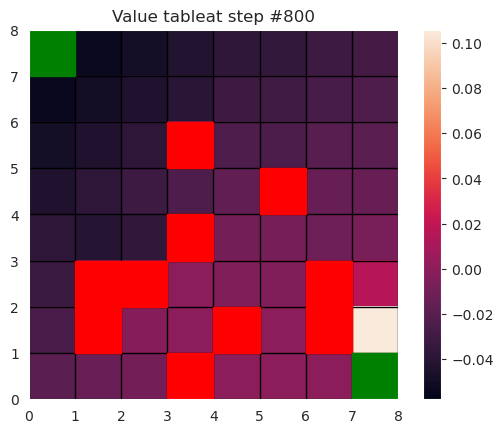

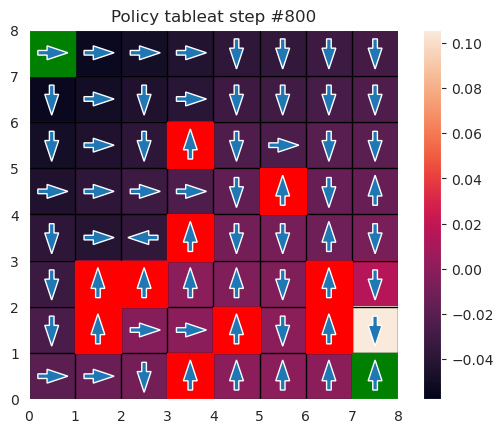

__________________________________


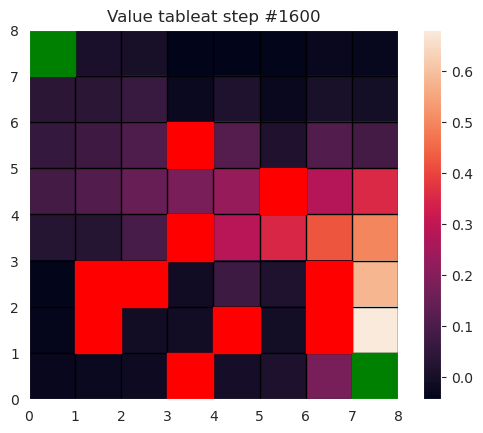

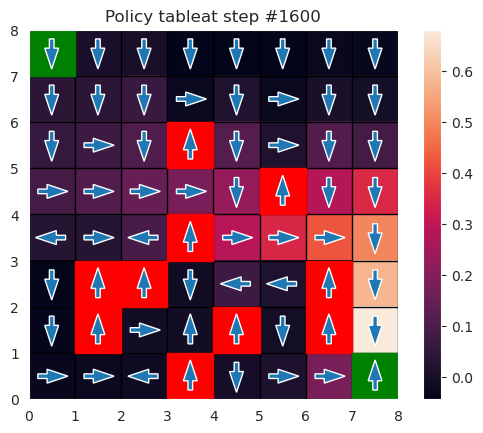

__________________________________


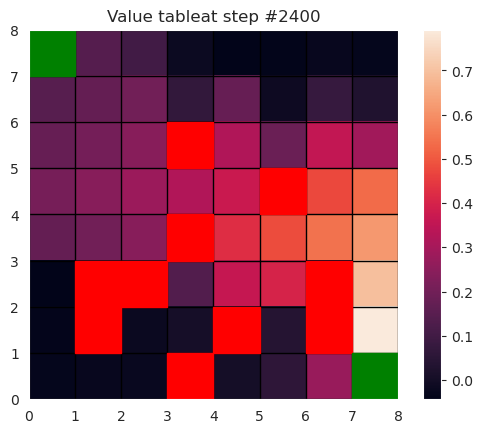

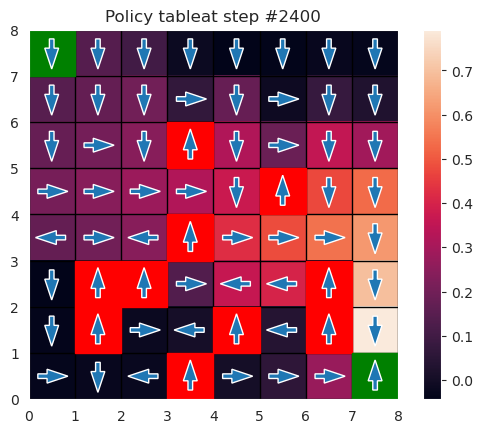

__________________________________


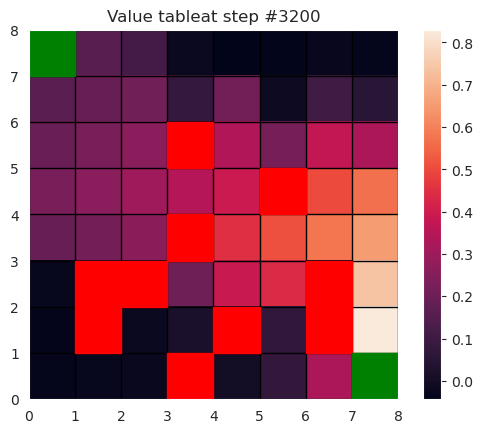

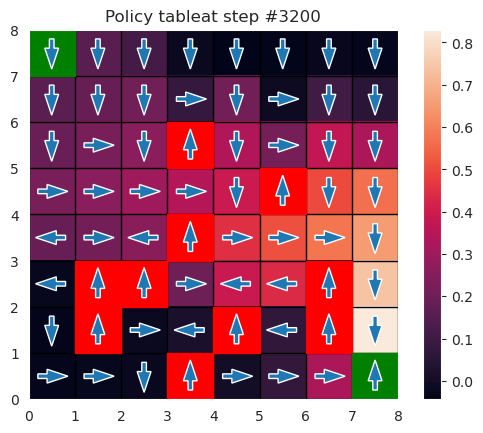

__________________________________
Learning curve


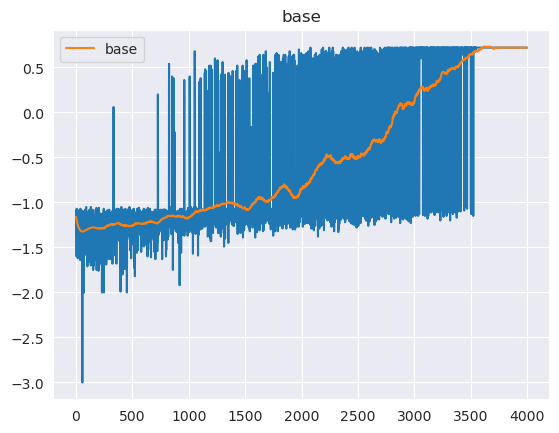

__________________________________
base
Mean reward: 0.72
Mean success rate: 1.0
Mean steps per success episode: 14.0
__________________________________
Final Q_Table:


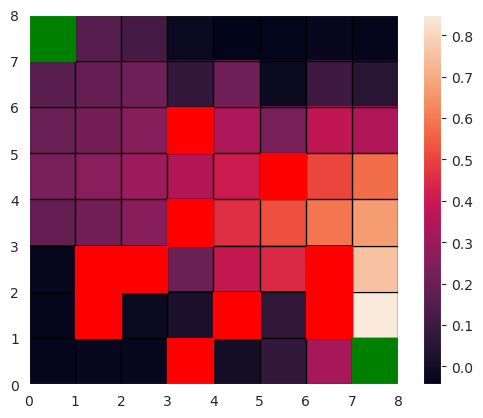

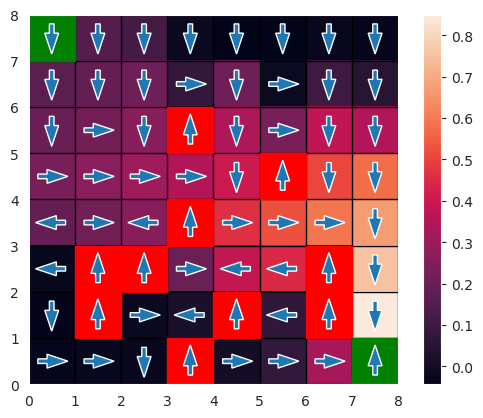

In [42]:
train(episodes=4000, td_num=1, lr=0.1, isSlippery=False)

With deterministic env(no slippery) the agent successfully learned the optimal policy

Next we will test the td-learning with number of steps 5

__________________________________


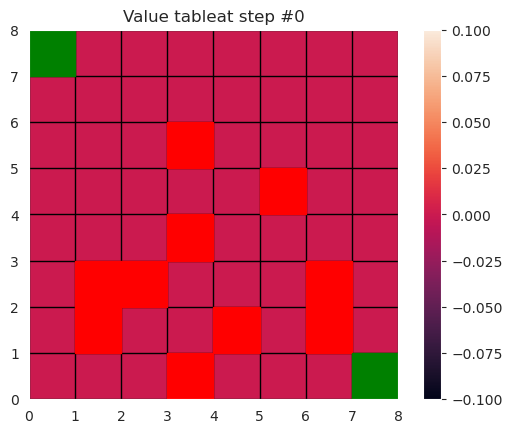

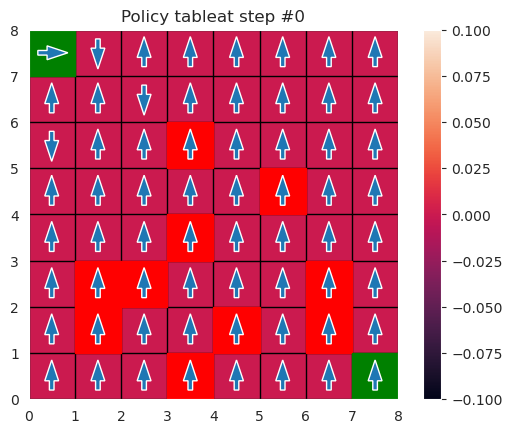

__________________________________


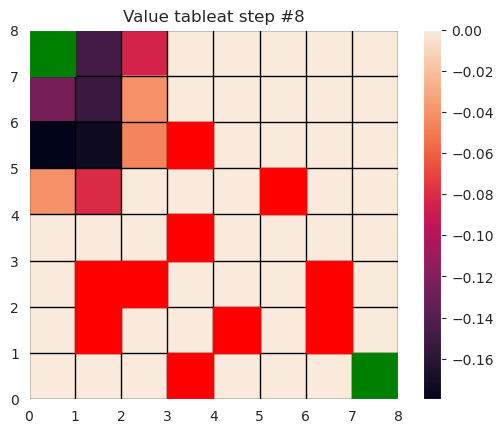

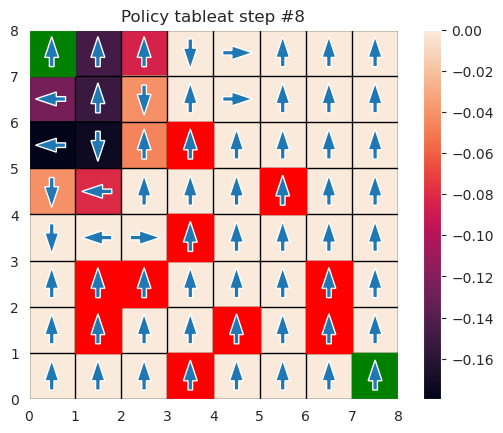

__________________________________


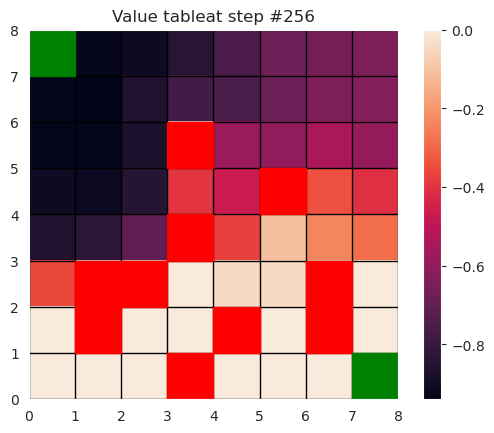

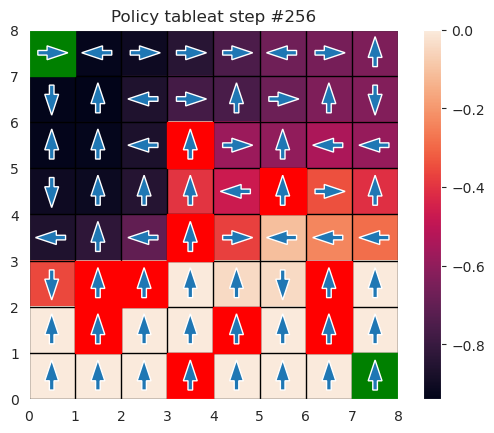

__________________________________


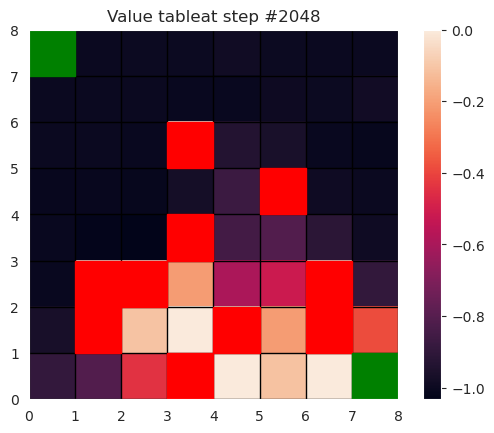

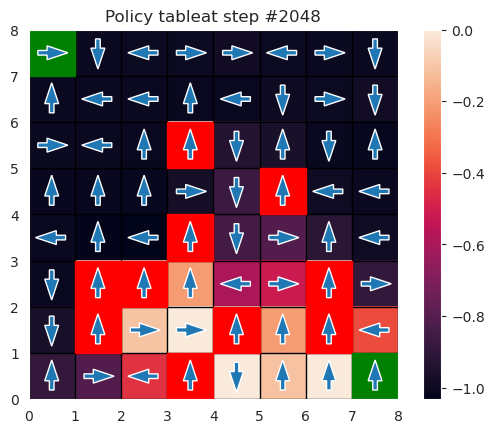

__________________________________


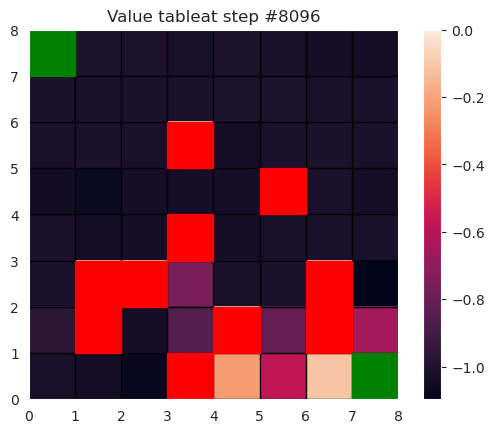

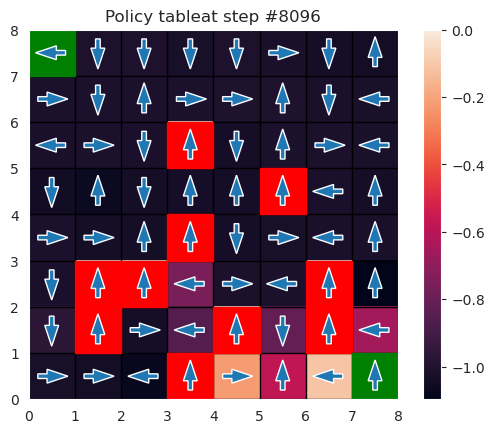

__________________________________
Learning curve


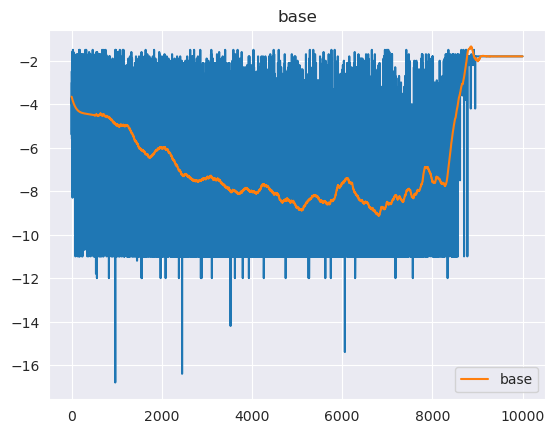

__________________________________
base
Mean reward: -1.8000000000000005
Mean success rate: 1.0
Mean steps per success episode: 14.0
__________________________________
Final Q_Table:


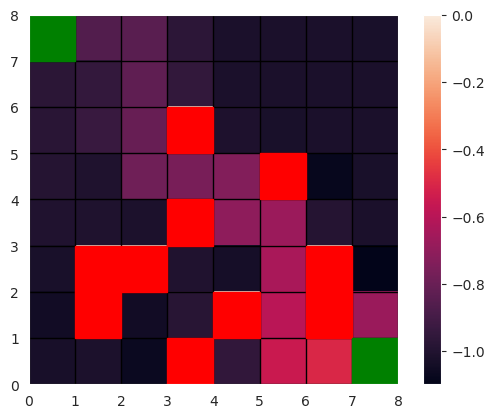

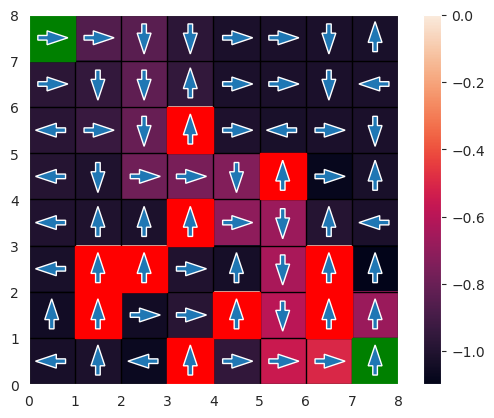

In [29]:
train(episodes=10000, td_num=5, lr=0.1, cost_of_living=0.1, isSlippery=False, draw_q_table=[0, 8, 256, 2048, 8096], terminated_penalty=1)

the temporal difference learning showed worse performance, mainly because the environment of the frozen lake is better for the one step update, since we care way less about doing strategy, we just need to understand which actions leads the agent to termination(falling into hole).

next will test the stochastic env by turning is slippery to true

__________________________________


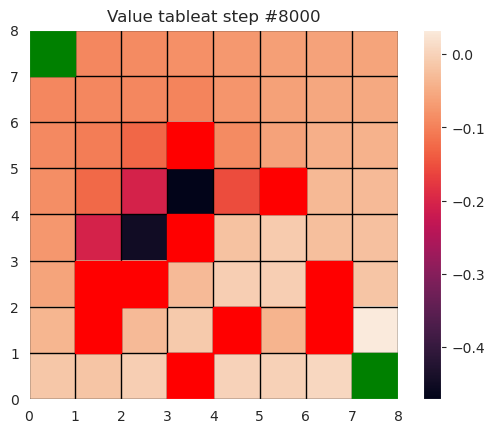

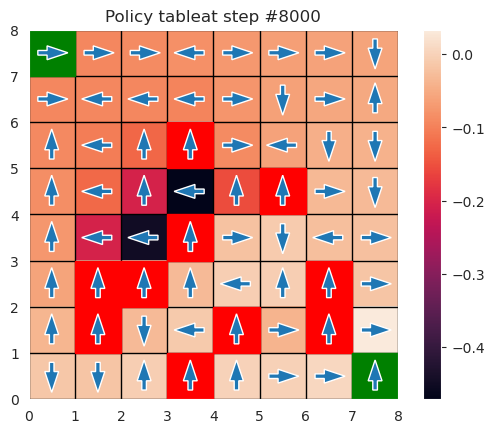

__________________________________


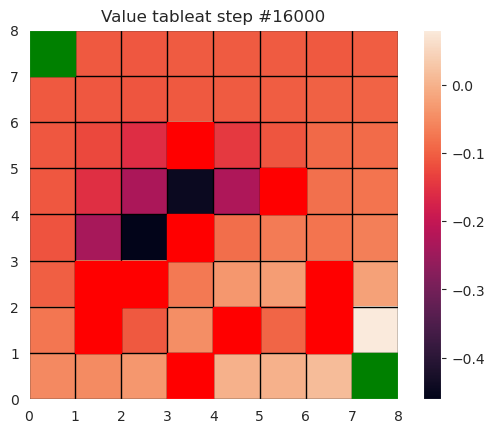

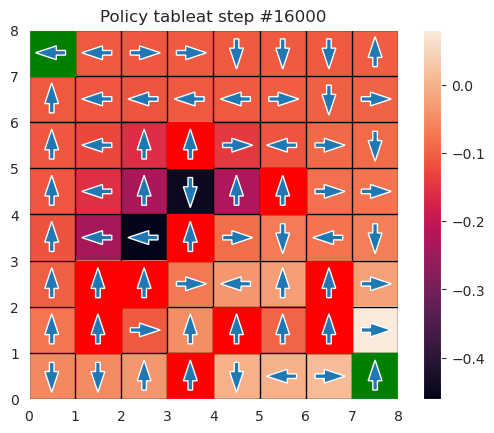

__________________________________


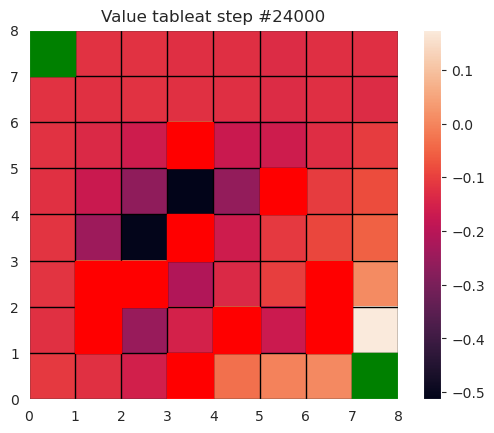

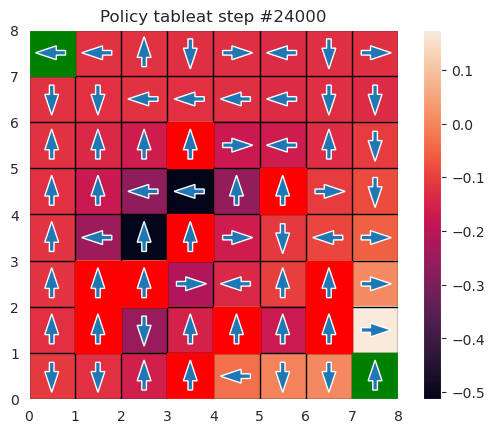

__________________________________


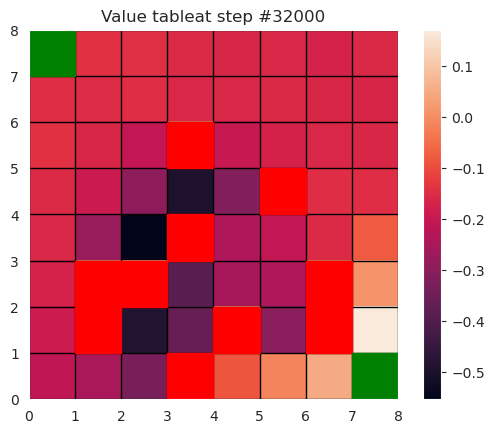

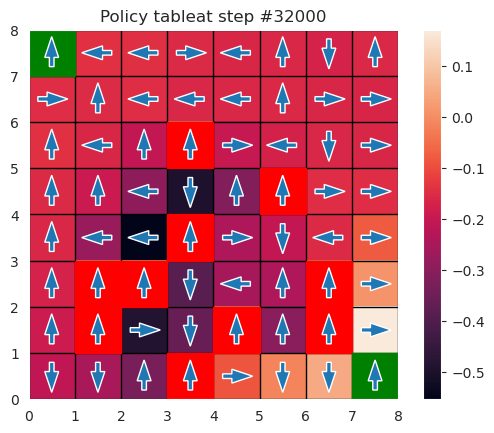

__________________________________
Learning curve


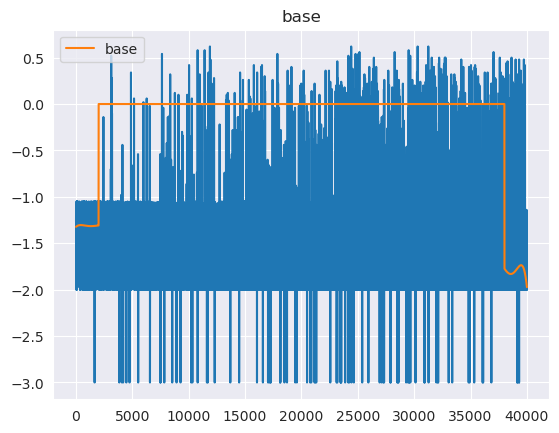

__________________________________
base
Mean reward: -1.7748475000000004
Mean success rate: 0.09
Mean steps per success episode: 69.20769230769231
__________________________________
Final Q_Table:


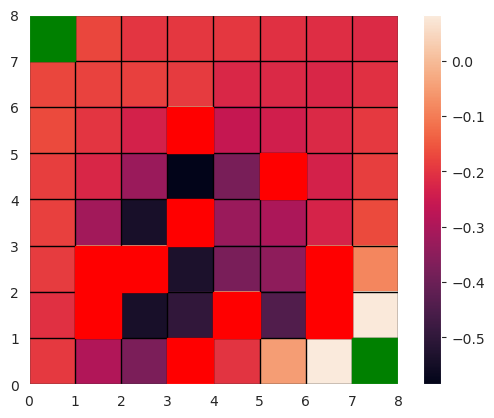

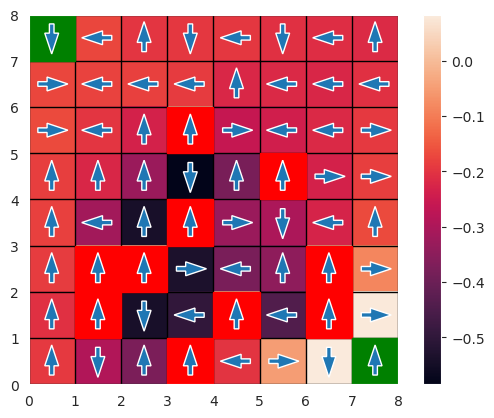

In [8]:
train(episodes=40000, td_num=1, lr=0.01, isSlippery=True)

__________________________________
LR 0.0001
Mean reward rate: 0.0
Mean steps per success episode: 71.0
__________________________________
LR 0.01
Mean reward rate: 0.045
Mean steps per success episode: 68.33333333333333
__________________________________
LR 0.1
Mean reward rate: 0.555
Mean steps per success episode: 63.233333333333334
__________________________________
LR 0.5
Mean reward rate: 0.39
Mean steps per success episode: 63.05882352941177


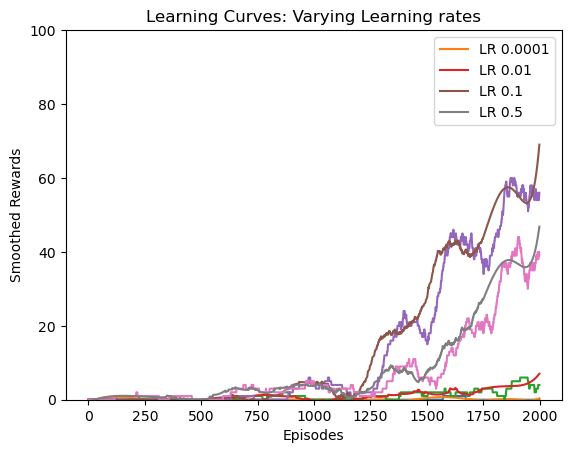

In [13]:
train(episodes=2000, learning_rate=0.0001, label="LR 0.0001")
train(episodes=2000, learning_rate=0.01, label="LR 0.01")
train(episodes=2000, learning_rate=0.1, label="LR 0.1")
train(episodes=2000, learning_rate=0.5, label="LR 0.5")

plt.title("Learning Curves: Varying Learning rates")
plt.xlabel("Episodes")
plt.ylabel("Smoothed Rewards")
plt.legend()
plt.show()


__________________________________
DF 0.99
Mean reward rate: 0.517
Mean steps per success episode: 66.1063829787234
__________________________________
DF 0.2
Mean reward rate: 0.267
Mean steps per success episode: 66.10759493670886


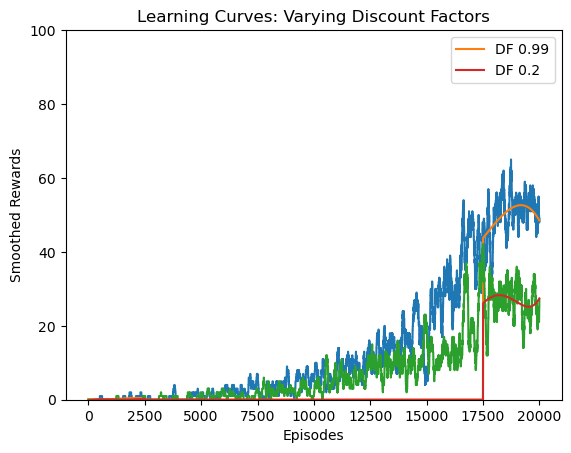

In [14]:
# Different Discount Factors
train(episodes=20000, discount_factor=0.99, label="DF 0.99")
train(episodes=20000, discount_factor=0.2, label="DF 0.2")

plt.title("Learning Curves: Varying Discount Factors")
plt.xlabel("Episodes")
plt.ylabel("Smoothed Rewards")
plt.legend()
plt.show()

__________________________________
10000 episodes
Mean reward rate: 0.428
Mean steps per success episode: 66.49557522123894
__________________________________
20000 episodes
Mean reward rate: 0.58
Mean steps per success episode: 63.181268882175225
__________________________________
40000 episodes
Mean reward rate: 0.5945
Mean steps per success episode: 63.80209895052474
__________________________________
100000 episodes
Mean reward rate: 0.5479
Mean steps per success episode: 64.19646125686394


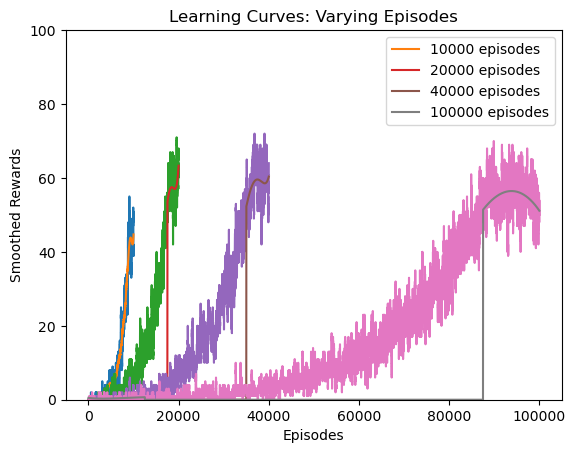

In [15]:
train(episodes=10000, learning_rate=0.01, label="10000 episodes")

train(episodes=20000, learning_rate=0.01, label="20000 episodes")

train(episodes=40000, learning_rate=0.01, label="40000 episodes")

train(episodes=100000, learning_rate=0.01, label="100000 episodes")

plt.title("Learning Curves: Varying Episodes")
plt.xlabel("Episodes")
plt.ylabel("Smoothed Rewards")
plt.legend()
plt.show()
